In [1]:
using Distributions
using LinearAlgebra
using Plots
using StatsBase
using DataFrames

In [2]:
pyplot()

Plots.PyPlotBackend()

# 1.5)

## Question
13. In many pattern classiﬁcation problems one has the option either to assign the
pattern to one of c classes, or to reject it as being unrecognizable. If the cost for
rejects is not too high, rejection may be a desirable action. Let
\begin{equation}
\lambda(\alpha_i | \omega_j) = 
\begin{cases}
    0 & i=j \\
    \lambda_r & i = c+1 \\
    \lambda_s & otherwise \\
\end{cases}
\end{equation}
where $\lambda_r$ is the loss incurred for choosing the (c + 1)th action, rejection, and $\lambda_s$ is the loss incurred for making a substitution error. Show that the minimum risk is obtained if we decide $\omega_i$ if $P(\omega_i | x) \ge P(\omega_j | x)$ for all j and if $P(\omega_i | x) \gt 1- \frac{\lambda_r}{\lambda_s}$, and reject otherwise.  What happens if $\lambda_r = 0$? What happens if $\lambda_r \gt \lambda_s$?

## Answer

If $\lambda_r = 0$, it costs nothing to classify an example as being unrecognizable.  An optimal solution for the problem is to then just classify every example as unrecognizable, incurring a cost, $\lambda$ of 0.  
If $\lambda_r \gt \lambda_s$, then it is less costly to missclassify an example then to mark it as unrecognizable.  The optimal solution is then to never use the option to classify something as unrecognizable.

# 1.6)

$P(x_i | \omega_i) \sim N(\mu, \sigma)$

Generates samples all from one class, chooses class randomly

In [8]:
function generateGaussianSamples(μ1, μ2, σ1, σ2, nSamples, prior)
    class = rand() > prior ? 2 : 1
    if class == 1
        dist = MvNormal(μ1, σ1);
    else
        dist = MvNormal(μ2, σ2);
    end
    samples = rand(dist, nSamples);
    return samples, class
end

generateGaussianSamples (generic function with 1 method)

Generates samples from both classes with prior

In [9]:
function generateGaussianSamples(μ1, μ2, σ1, σ2, nSamples, prior)
    dists = [MvNormal(μ1, σ1) MvNormal(μ2, σ2)]
    classes = [rand() > prior ? 2 : 1 for i in 1:nSamples]
    samples = [rand(dists[classes[i]], 1) for i in 1:nSamples]
    samps2d = zeros(nSamples, 2)
    for i in 1:nSamples
        samps2d[i,:] = samples[i]
    end
    return samps2d, classes
end

generateGaussianSamples (generic function with 1 method)

## a)

In [496]:
μ1 = Vector([0.; 0.])
σ1 = Matrix(I, 2, 2)
μ2 = Vector([3.; 3.])
σ2 = Matrix(I, 2, 2)
res, classes = generateGaussianSamples(μ1, μ2, σ1, σ2, 4000, 0.5)
size(res)

(4000, 2)

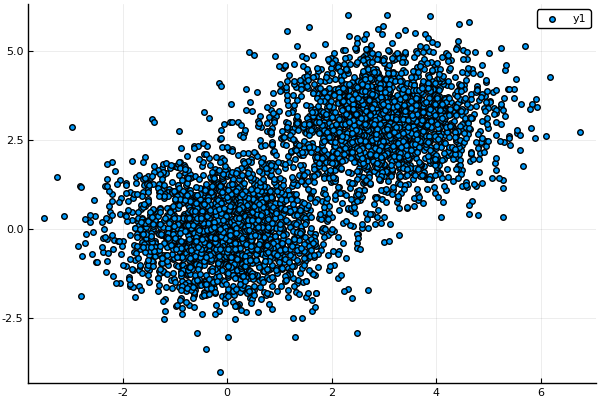

In [497]:
scatter(res[:,1], res[:,2])

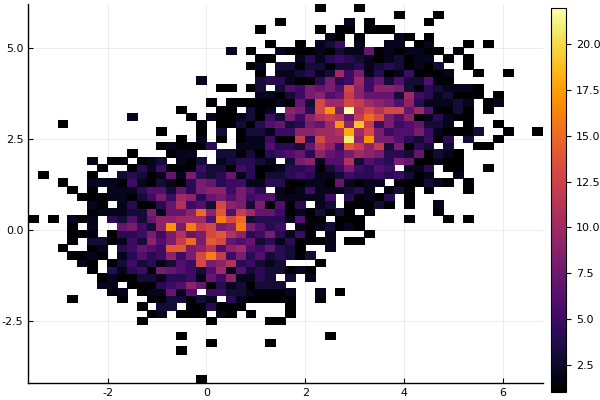

In [499]:
histogram2d(res[:,1], res[:,2], nbins=50)

## b)

In [505]:
μ1 = [0.; 0.]
σ1 = [3 1; 1 0.8]
μ2 = [3.; 3.]
σ2 = σ1
res, class = generateGaussianSamples(μ1, μ2, σ1, σ2, 4000, 0.5);

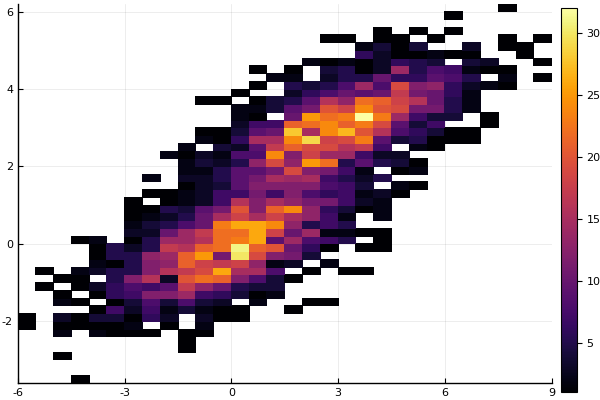

In [506]:
histogram2d(res[:,1], res[:,2], nbins=50)

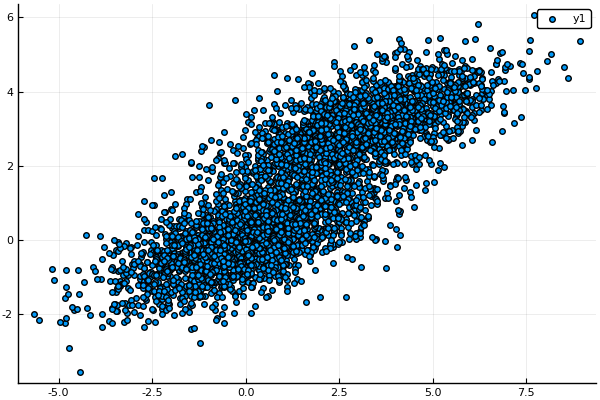

In [507]:
scatter(res[:,1], res[:,2])

## c)

In [526]:
μ1 = [0.; 0.]
σ1 = [2 0.5; 0.5 2]
μ2 = [2.; 2.]
σ2 = [2 -1.9; -1.9 2]
res, class = generateGaussianSamples(μ1, μ2, σ1, σ2, 4000, 0.5);

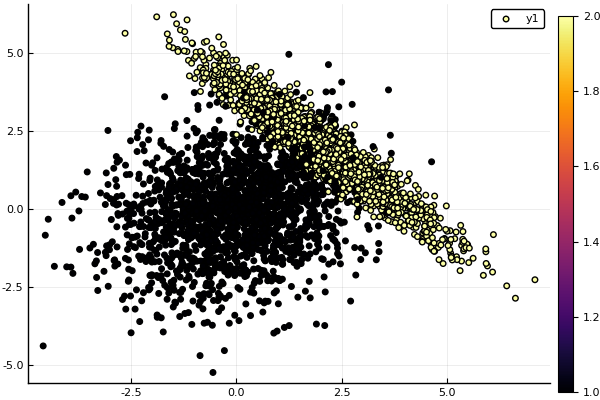

In [527]:
scatter(res[:,1], res[:,2], zcolor=class)

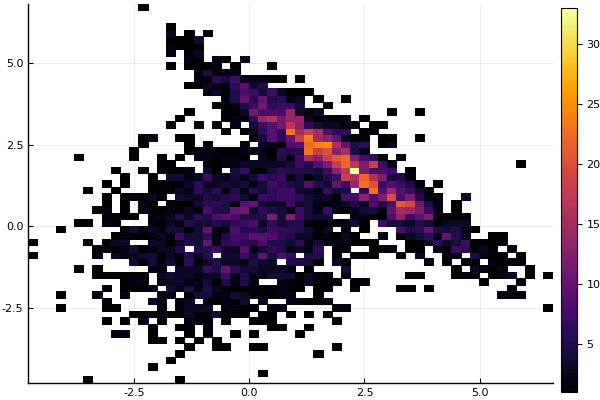

In [511]:
histogram2d(res[:,1], res[:,2], nbins=100)

## d)

In [524]:
μ1 = Vector([0.; 0.])
σ1 = Matrix(I, 2, 2)
μ2 = Vector([3.; 3.])
σ2 = Matrix(I, 2, 2)
res, class = generateGaussianSamples(μ1, μ2, σ1, σ2, 4000, 0.05);

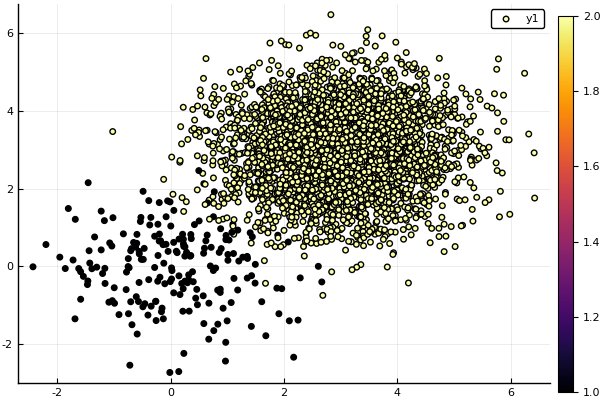

In [525]:
scatter(res[:,1], res[:,2], zcolor=class)

## e)

In [528]:
μ1 = [0.; 0.]
σ1 = [3 1; 1 0.8]
μ2 = [3.; 3.]
σ2 = σ1
res, class = generateGaussianSamples(μ1, μ2, σ1, σ2, 4000, 0.05);

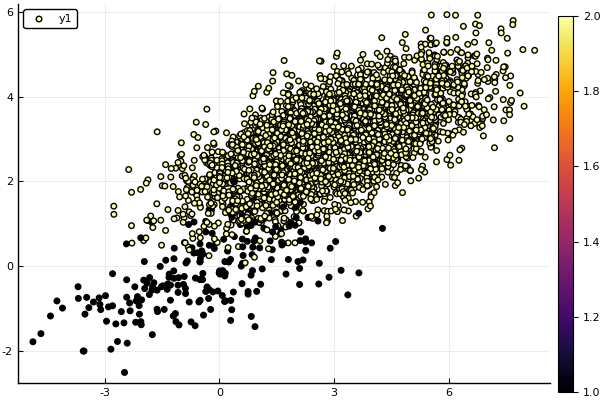

In [529]:
scatter(res[:,1], res[:,2], zcolor=class)

## f)

In [530]:
μ1 = [0.; 0.]
σ1 = [2 0.5; 0.5 2]
μ2 = [2.; 2.]
σ2 = [2 -1.9; -1.9 2]
res, class = generateGaussianSamples(μ1, μ2, σ1, σ2, 4000, 0.05);

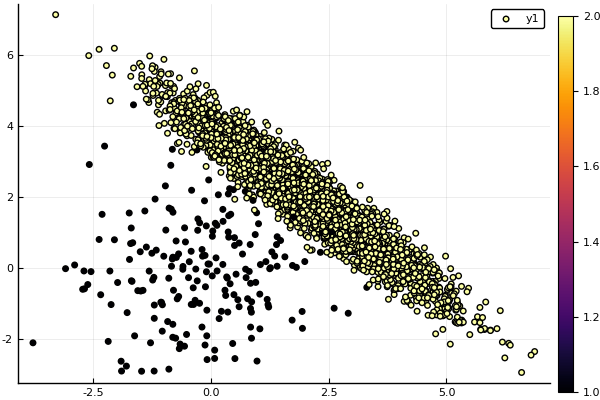

In [531]:
scatter(res[:,1], res[:,2], zcolor=class)

# 3)

$P(\mu_1 | x) = \frac{P(x | \mu_1) * P(\mu_1)}{P(x)}$

In [3]:
function bayes_unit_cov(μ1, μ2, samples, prior)
    px_given_μ1 = [pdf(MvNormal(μ1, 1), samples[i,:]) for i in 1:length(samples[:,1])];
    px_given_μ2 = [pdf(MvNormal(μ2, 1), samples[i,:]) for i in 1:length(samples[:,1])];
    px = px_given_μ1 * prior + px_given_μ2 * (1-prior);
    p_μ1_given_x = px_given_μ1 * prior ./ px;
    p_μ2_given_x = px_given_μ2 * (1-prior) ./ px;
    return hcat(p_μ1_given_x, p_μ2_given_x)
end

bayes_unit_cov (generic function with 1 method)

In [10]:
function bayes_shared_cov(μ1, μ2, Σ, samples, prior)
    px_given_μ1 = [pdf(MvNormal(μ1, Σ), samples[i,:]) for i in 1:length(samples[:,1])];
    px_given_μ2 = [pdf(MvNormal(μ2, Σ), samples[i,:]) for i in 1:length(samples[:,1])];
    px = px_given_μ1 * prior + px_given_μ2 * (1-prior);
    p_μ1_given_x = px_given_μ1 * prior ./ px;
    p_μ2_given_x = px_given_μ2 * (1-prior) ./ px;
    return hcat(p_μ1_given_x, p_μ2_given_x)
end

bayes_shared_cov (generic function with 2 methods)

In [15]:
function gen_bayes(μ1, μ2, Σ1, Σ2, samples, prior)
    px_given_μ1 = [pdf(MvNormal(μ1, Σ1), samples[i,:]) for i in 1:length(samples[:,1])];
    px_given_μ2 = [pdf(MvNormal(μ2, Σ2), samples[i,:]) for i in 1:length(samples[:,1])];
    px = px_given_μ1 * prior + px_given_μ2 * (1-prior);
    p_μ1_given_x = px_given_μ1 * prior ./ px;
    p_μ2_given_x = px_given_μ2 * (1-prior) ./ px;
    return hcat(p_μ1_given_x, p_μ2_given_x)
end

gen_bayes (generic function with 1 method)

In [12]:
function accuracy(guesses, answers)
    preds = [ guesses[i,1] > guesses[i,2] ? 1 : 2 for i in 1:size(guesses)[1] ];
    results = hcat(preds, answers)
    correct = sum([results[i,1] == results[i,2] ? 1 : 0 for i in 1:size(results)[1]])
    pct_correct = correct / length(preds)
end

accuracy (generic function with 1 method)

In [16]:
μ1 = [0.; 0.]
σ1 = Matrix(I, 2, 2)
μ2 = [3.; 3.]
σ2 = σ1
prior = 0.1
res, classes = generateGaussianSamples(μ1, μ2, σ1, σ2, 40, prior)
raw = bayes_shared_cov(μ1, μ2, σ1, res, 0.5)

40×2 Array{Float64,2}:
 6.45173e-5   0.999935  
 0.000370452  0.99963   
 1.34231e-6   0.999999  
 0.000143776  0.999856  
 0.00243899   0.997561  
 0.000988692  0.999011  
 0.00389894   0.996101  
 0.000785405  0.999215  
 0.000377346  0.999623  
 1.83788e-9   1.0       
 0.999952     4.80001e-5
 2.7275e-5    0.999973  
 3.44688e-6   0.999997  
 ⋮                      
 1.83021e-6   0.999998  
 8.81263e-6   0.999991  
 1.6679e-6    0.999998  
 0.992938     0.00706164
 0.0038298    0.99617   
 0.0745205    0.925479  
 8.29178e-7   0.999999  
 5.82153e-6   0.999994  
 0.00134961   0.99865   
 0.0196682    0.980332  
 0.000184273  0.999816  
 0.00907454   0.990925  

In [13]:
accuracy(raw, classes)

0.975